In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def slope_unc (x,y,fit):
    sqsum = sum((y-fit(x))**2)
    Delta = x.size*sum(x**2)-(sum(x))**2
    sigma = np.sqrt(1/(x.size-2)*sqsum)
    return (sigma*np.sqrt(x.size/Delta))

In [3]:
amb = np.array([72,95,66,71,54,96,79,86,78,84])

In [4]:
amb = amb/300

### Cesium-137

In [5]:
cs2 = np.array([477,414,448,1325,1298,1290,4339])
t = np.array([60,60,60,180,180,180,600])

In [6]:
cs2 = cs2/t

In [7]:
cs2

array([7.95      , 6.9       , 7.46666667, 7.36111111, 7.21111111,
       7.16666667, 7.23166667])

In [8]:
cs4 = np.array([193,184,184,600,593,583])
t = np.array([60,60,60,180,180,180])

In [9]:
cs4 = cs4/t

In [10]:
cs8 = np.array([64,58,66,216,208,182])
t = np.array([60,60,60,180,180,180])

In [11]:
cs8 = cs8/t

In [12]:
cs8

array([1.06666667, 0.96666667, 1.1       , 1.2       , 1.15555556,
       1.01111111])

In [13]:
amb = np.average(amb)

In [14]:
cs8 = cs8-amb
cs4 = cs4-amb
cs2 = cs2-amb

In [15]:
r = np.array([2,4,8])
i = np.array([np.average(cs2),np.average(cs4),np.average(cs8)])

In [16]:
z=np.polyfit(np.log(r),np.log(i),1)
f=np.poly1d(z)

In [17]:
def inv_square (x,a):
    return (a/(x**2))
def free_fit (x,a,b):
    return (a/(x**b))
def log_fit (x,a):
    return (a/(x**(-z[0])))

In [18]:
popt,cov = curve_fit(inv_square,r,i)

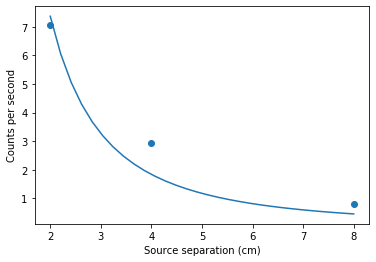

In [19]:
x = np.linspace(2,8,30)
plt.scatter(r,i)
plt.plot(x,inv_square(x,popt[0]))
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.show()

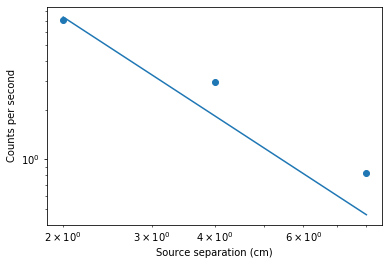

In [20]:
plt.scatter(r,i)
plt.plot(x,inv_square(x,popt[0]))
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [21]:
popt,cov = curve_fit(log_fit,r,i)

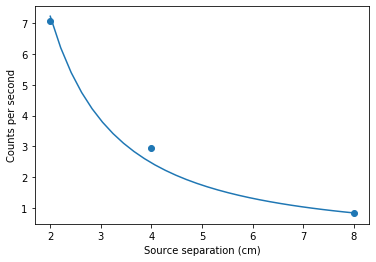

In [22]:
plt.scatter(r,i)
plt.plot(x,log_fit(x,popt[0]))
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.show()

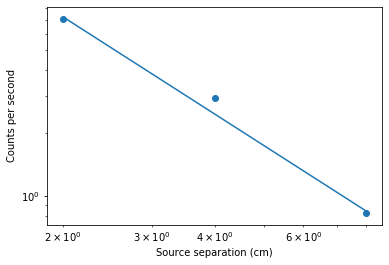

In [23]:
plt.scatter(r,i)
plt.plot(x,log_fit(x,popt[0]))
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [24]:
popt,cov = curve_fit(free_fit,r,i)

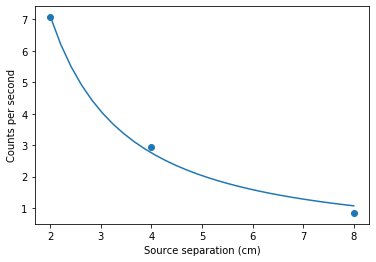

In [25]:
plt.scatter(r,i)
plt.plot(x,free_fit(x,popt[0],popt[1]))
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.show()

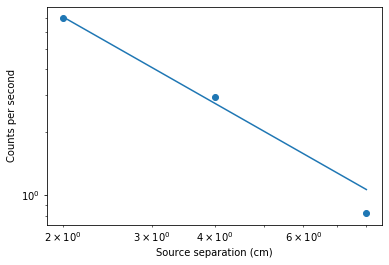

In [26]:
plt.scatter(r,i)
plt.plot(x,free_fit(x,popt[0],popt[1]))
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [27]:
slope_unc(np.log(r),np.log(i),f)

0.16572493292415508

In [28]:
z

array([-1.55100684,  3.09675022])

### Barium-133

In [29]:
ba2 = np.array([86,78,102,301,286,303,1006])
t = np.array([60,60,60,180,180,180,600])

In [30]:
ba2 = ba2/t

In [32]:
ba4 = np.array([79,81,78,218,236,224])
t = np.array([60,60,60,180,180,180])

In [33]:
ba4 = ba4/t

In [41]:
ba2 = ba2-amb
ba4 = ba4-amb

In [42]:
ba = np.array([np.average(ba2),np.average(ba4),np.average(cs8)])

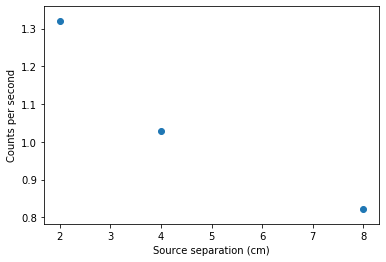

In [43]:
plt.scatter(r,ba)
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.show()

In [44]:
c=np.polyfit(np.log(r),np.log(ba),1)
g=np.poly1d(c)

array([-0.34017066,  0.508288  ])